# Customizing Maplotlib: Configurations and Stylesheets

__Import libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

---

## Plot Customization by Hand

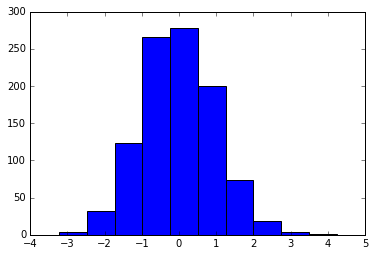

In [2]:
x = np.random.randn(1000)
plt.hist(x);

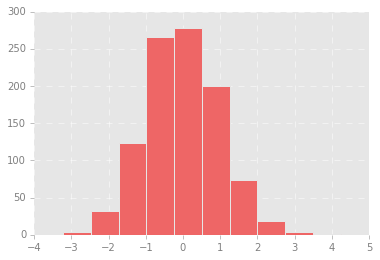

In [20]:
# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True) # to make the grid axis behind the histogram

# draw solid white grid lines
plt.grid(color='white', linestyle='dashed')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

---

## Changing the Defaults: rcParams

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. You can adjust this configuration at any time using the plt.rc convenience routine. Let’s see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

In [21]:
Ipython_default = plt.rcParams.copy()

In [26]:
from matplotlib import cycler
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD',
                          '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
      axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='white', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

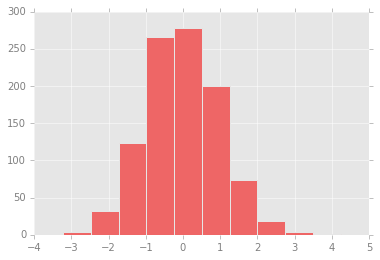

In [29]:
plt.hist(x);

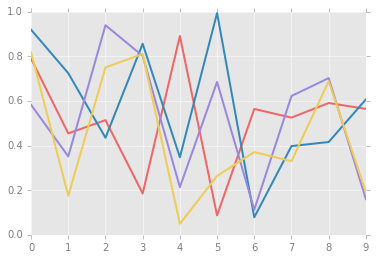

In [30]:
for i in range(4):
    plt.plot(np.random.rand(10))

---

## Stylesheets

In [32]:
plt.style.available[:5]

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight']

Basic way to change to stylesheet is to call: plt.style.use('stylename')

But keep in mind that this will change the style for the rest of the session! Alternatively, you can use the style context manager, which sets a style temporarily: <br>
> with plt.style.context('stylename'): <br> 
>> make_a_plot()

In [33]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

### Default style

In [43]:
# reset rcParams
plt.rcParams.update(Ipython_default);

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


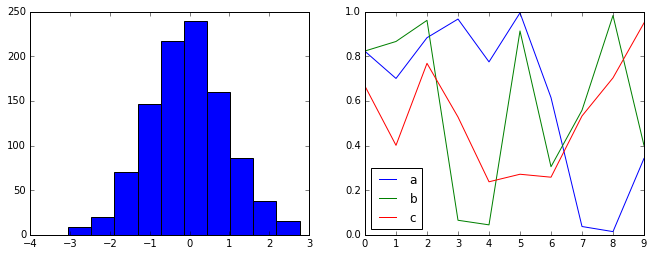

In [36]:
hist_and_lines()

### FiveThirtyEight style

The FiveThirtyEight style mimics the graphics found on the popular FiveThirtyEight website.

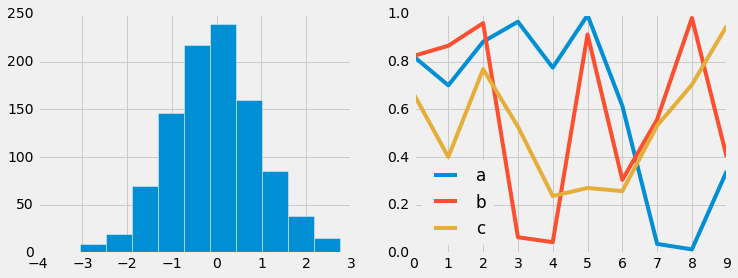

In [37]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

The ggplot package in the R language is a very popular visualization tool.

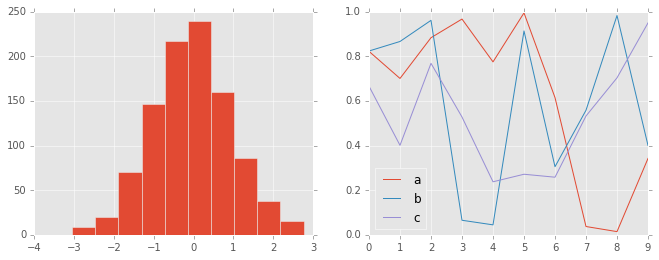

In [38]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Bayesian Methods for Hacker style

There is a very nice short online book called Probabilistic Programming and Bayesian Methods for Hackers; it features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually appealing style throughout the book.

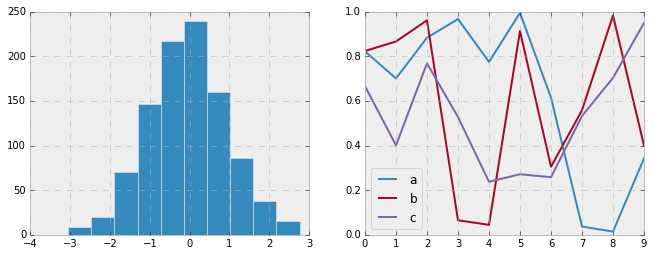

In [39]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

For figures used within presentations, it is often useful to have a dark rather than light background.

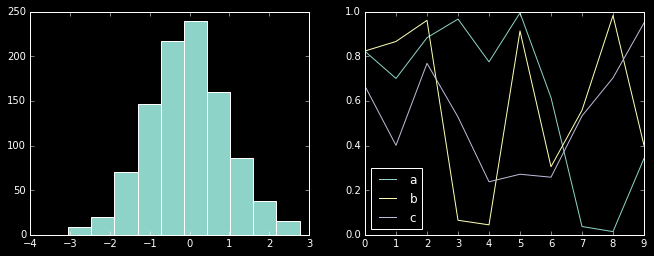

In [40]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

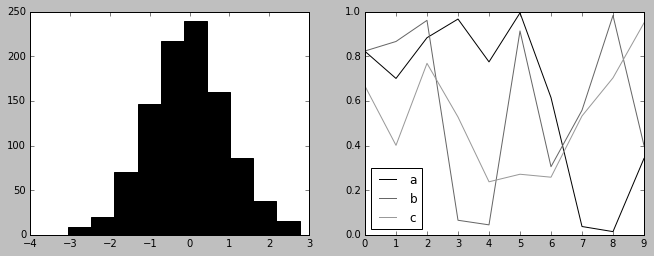

In [41]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

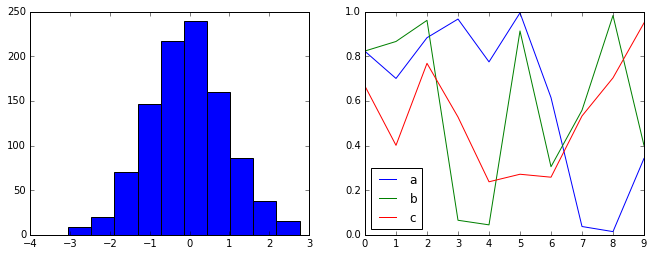

In [42]:
import seaborn
hist_and_lines()